In [3]:
import transformers 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

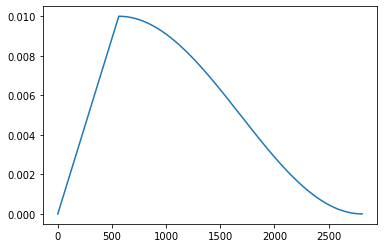

In [4]:
total_samples = 9000
bs = 32
n_epochs = 10

num_warmup_steps = (total_samples // bs) * 2
num_total_steps = (total_samples // bs) * n_epochs

model = nn.Linear(2, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = transformers.get_cosine_schedule_with_warmup(optimizer, 
                                                         num_warmup_steps=num_warmup_steps, 
                                                         num_training_steps=num_total_steps)
lrs = []
for i in range(num_total_steps):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()
    
plt.plot(lrs)
plt.show()